# Predicting Type of Chest Pain Using Age and Serum Cholesterol Levels as Predictors

  Elevated cholesterol levels result in plaque build up in arterial walls known as atherosclerosis. This build up causes arteries to narrow, restricting blood flow to the heart. Angina is any chest pain caused by reduced blood flow to the heart. Angina is a warning sign for risk of heart attack and stroke. 
  
  We will be using a classification model to answer the predictive question can we use the age and serum cholesterol levels of the patient to predict what type of chest pain the patient is experiencing.  The dataset we are using has heart disease data from Cleveland Clinic Foundation retrieved from the web. The dataset contains 14 variables including age, sex, type of chest pain, resting blood pressure, serum cholesterol, fasting blood sugar, resting ECG, maximum heart rate, exercise induced angina, ST depression induced by exercise, slope of peak exercise segment, number of major vessels, defect, and angiographic disease status. It was processed from a larger data set containing 76 raw attributes but only 14 were deemed useful. 

In [17]:
library(tidyverse)
library(readr)
library(tidymodels)
set.seed(1)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_data <- read_csv(url, col_names = c("Age", "Sex", "Chest_Pain", "Rest_BP",
                                             "Cholesterol", "Fast_BS", "Rest_ECG", 
                                             "Max_HR", "Ex_Angina", "ST_Dep", "Slope",
                                             "Vessels", "Thal", "Disease_Presence")) |>
mutate(Chest_Pain = as_factor(Chest_Pain))
cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Vessels, Thal
dbl (12): Age, Sex, Chest_Pain, Rest_BP, Cholesterol, Fast_BS, Rest_ECG, Max...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Chest_Pain,Rest_BP,Cholesterol,Fast_BS,Rest_ECG,Max_HR,Ex_Angina,ST_Dep,Slope,Vessels,Thal,Disease_Presence
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [16]:
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = Chest_Pain)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)
glimpse(cleveland_test)

Rows: 226
Columns: 14
$ Age              <dbl> 41, 56, 44, 49, 58, 58, 71, 41, 44, 48, 52, 54, 45, 4…
$ Sex              <dbl> 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,…
$ Chest_Pain       <fct> 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Rest_BP          <dbl> 130, 120, 120, 130, 150, 120, 160, 105, 130, 130, 120…
$ Cholesterol      <dbl> 204, 236, 263, 266, 283, 284, 302, 198, 219, 245, 325…
$ Fast_BS          <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,…
$ Rest_ECG         <dbl> 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,…
$ Max_HR           <dbl> 172, 178, 173, 171, 162, 160, 162, 168, 188, 180, 172…
$ Ex_Angina        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,…
$ ST_Dep           <dbl> 1.4, 0.8, 0.0, 0.6, 1.0, 1.8, 0.4, 0.0, 0.0, 0.2, 0.2…
$ Slope            <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,…
$ Vessels          <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "2.0", "1.0…
$ Thal            

In [18]:

#There are not any rows with missing data

#Table 1 Count and percentage for each category of chestpain
num_obs <- nrow(cleveland_train)
cleveland_train|>
group_by(Chest_Pain)|>
summarize(count = n(), percentage = n()/num_obs*100)

Chest_Pain,count,percentage
<fct>,<int>,<dbl>
1,18,7.964602
2,39,17.256637
3,62,27.433628
4,107,47.345133


In [20]:
#Table 2 mean values for the predictor of each category of chestpain
cleveland_train|>
group_by(Chest_Pain)|>
summarize(Average_Age = mean(Age), Average_Cholesterol = mean(Cholesterol), average_Rest_BP = mean(Rest_BP), average_Max_HR = mean(Max_HR))

Chest_Pain,Average_Age,Average_Cholesterol,average_Rest_BP,average_Max_HR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,54.83333,235.3333,138.5000,157.0000
2,51.15385,243.6410,129.1795,165.5385
3,52.79032,241.8226,129.9032,156.4194
4,55.65421,250.1121,131.8318,140.6729


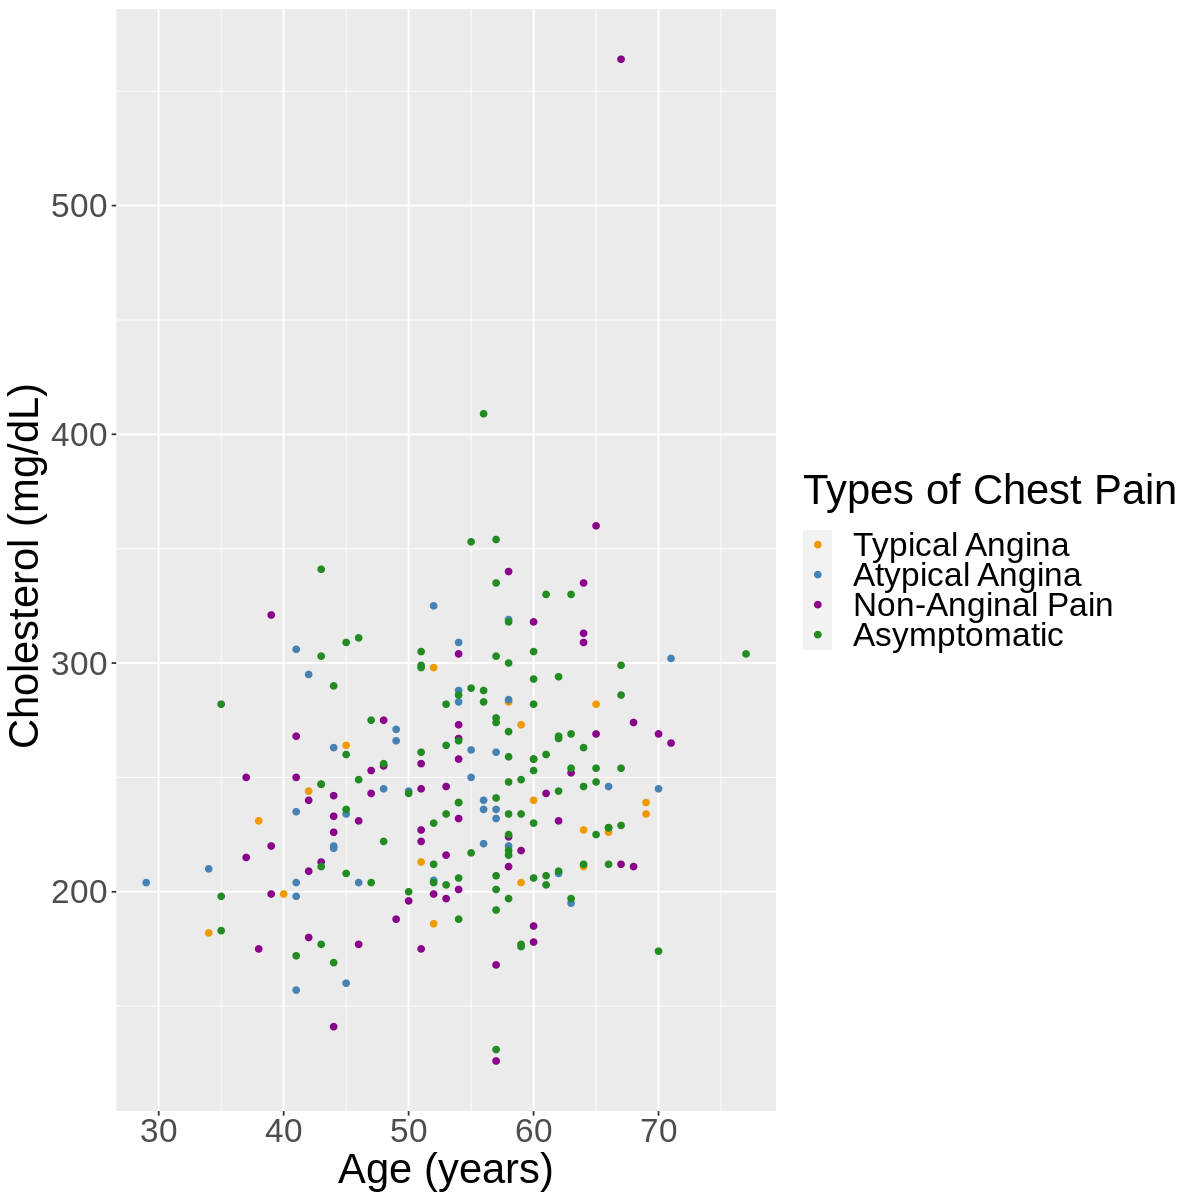

In [28]:
#need to redo with training data and new predictors
#Visualization of cholesterol and age
options(repr.plot.width = 10, repr.plot.height = 10)
choles_age <- cleveland_train |>
    ggplot(aes(x = Age, y = Cholesterol, color = Chest_Pain))+
    geom_point()+
    labs(x = "Age (years)", y = "Cholesterol (mg/dL) ", color = "Types of Chest Pain")+
    scale_color_manual(labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"),
                        values = c("orange2", "steelblue", "darkmagenta", "forestgreen")) +
    theme(text = element_text(size = 25))
choles_age